In [23]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
import warnings
warnings.filterwarnings('ignore')
import random

In [2]:
n = 41390267
s = 100000
skip = sorted(random.sample(range(2,n),n-s))

In [3]:
train_modified = pd.read_csv('train_modified.csv',skiprows = skip)

In [4]:
train_modified.fillna(train_modified.mean(),inplace = True)
train_modified.isnull().any()

Semana                       False
Agencia_ID                   False
Canal_ID                     False
Ruta_SAK                     False
Cliente_ID                   False
Producto_ID                  False
Client_Type                  False
Producto_name                False
weight                       False
pieces                       False
weight_per_piece             False
Demanda_uni_equil            False
Demanda_uni_equil_tminus1    False
Demanda_uni_equil_tminus2    False
Demanda_uni_equil_tminus3    False
Demanda_uni_equil_tminus4    False
Demanda_uni_equil_tminus5    False
Agencia_ID_count             False
Canal_ID_count               False
Ruta_SAK_count               False
Cliente_ID_count             False
Producto_ID_count            False
Client_Type_count            False
dtype: bool

In [5]:
train_modified[:5]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Client_Type,Producto_name,weight,pieces,...,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,Client_Type_count
0,6,1110,7,3301,73589,1212,8,428,120.0,2.0,...,0.0,0.0,0.0,0.0,6726.222,81297.336,3480.2222,12.111111,144403.0,3848448.80
1,6,1110,7,3316,2384175,1212,8,428,120.0,2.0,...,0.0,3.0,0.0,0.0,6726.222,81297.336,1358.0000,7.666666,144403.0,3848448.80
2,6,1111,1,1406,49905,1212,8,428,120.0,2.0,...,5.0,4.0,0.0,0.0,54553.555,8197713.000,7924.7780,39.222220,144403.0,3848448.80
3,6,1111,1,1417,806413,1212,13,428,120.0,2.0,...,2.0,1.0,0.0,0.0,54553.555,8197713.000,9873.4440,30.555555,144403.0,1875493.10
4,6,1112,1,1403,327108,1212,2,428,120.0,2.0,...,6.0,3.0,0.0,0.0,43113.332,8197713.000,8713.2230,40.000000,144403.0,232555.67


In [6]:
train_modified.columns

Index(['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID',
       'Producto_ID', 'Client_Type', 'Producto_name', 'weight', 'pieces',
       'weight_per_piece', 'Demanda_uni_equil', 'Demanda_uni_equil_tminus1',
       'Demanda_uni_equil_tminus2', 'Demanda_uni_equil_tminus3',
       'Demanda_uni_equil_tminus4', 'Demanda_uni_equil_tminus5',
       'Agencia_ID_count', 'Canal_ID_count', 'Ruta_SAK_count',
       'Cliente_ID_count', 'Producto_ID_count', 'Client_Type_count'],
      dtype='object')

In [7]:
data_num_scaled = MinMaxScaler().fit(train_modified.drop(columns =[ 'Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID',
                                           'Producto_ID','Client_Type', 'Producto_name'])).transform(train_modified.drop(columns =[ 'Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID',
                                           'Producto_ID','Client_Type', 'Producto_name']))
data_cat = train_modified[ ['Semana','Agencia_ID','Canal_ID','Ruta_SAK','Cliente_ID','Producto_ID','Client_Type', 'Producto_name']]
data_num_scaled = pd.DataFrame(data_num_scaled,columns = ['weight', 'pieces',
       'weight_per_piece', 'Demanda_uni_equil', 'Demanda_uni_equil_tminus1',
       'Demanda_uni_equil_tminus2', 'Demanda_uni_equil_tminus3',
       'Demanda_uni_equil_tminus4', 'Demanda_uni_equil_tminus5',
       'Agencia_ID_count', 'Canal_ID_count', 'Ruta_SAK_count',
       'Cliente_ID_count', 'Producto_ID_count', 'Client_Type_count'])
data_cat = pd.DataFrame(data_cat)
data_scaled = data_cat.join(data_num_scaled)
data_scaled[:5]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Client_Type,Producto_name,weight,pieces,...,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,Client_Type_count
0,6,1110,7,3301,73589,1212,8,428,0.00371,0.005025,...,0.000000,0.000000,0.0,0.0,0.068409,0.008932,0.062240,0.000740,0.568642,1.000000
1,6,1110,7,3316,2384175,1212,8,428,0.00371,0.005025,...,0.000000,0.001158,0.0,0.0,0.068409,0.008932,0.024275,0.000444,0.568642,1.000000
2,6,1111,1,1406,49905,1212,8,428,0.00371,0.005025,...,0.001989,0.001544,0.0,0.0,0.557410,1.000000,0.141749,0.002546,0.568642,1.000000
3,6,1111,1,1417,806413,1212,13,428,0.00371,0.005025,...,0.000796,0.000386,0.0,0.0,0.557410,1.000000,0.176609,0.001968,0.568642,0.487022
4,6,1112,1,1403,327108,1212,2,428,0.00371,0.005025,...,0.002387,0.001158,0.0,0.0,0.440442,1.000000,0.155853,0.002597,0.568642,0.059851


In [12]:
X = data_scaled.drop(columns = ['Demanda_uni_equil'])
Y = train_modified['Demanda_uni_equil']

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state = 1)

In [14]:
def RMSLE(actuals, predictions):
    """ Takes true values and predictions. Returns their Root Mean Squared Logarithmic Error.
    """
    result = 0.0
    actuals = np.asarray(actuals) * 1.0
    predictions = np.asarray(predictions)
    if(len(actuals) == len(predictions)):
        result = np.sqrt(sum(((np.log(predictions + 1.0) - np.log(actuals + 1.0)) ** 2) / len(actuals)))
        return result
    else: 
        return "Error!"

In [15]:
"""n_estimators = [30,60,90]
depth_value = [5,10,15]
alpha = [0.2,0.4,0.6]"""
n_estimators = [30,40,50]
depth_value = [5,10,15]
alpha = [0.1,0.3,0.5]

from sklearn.metrics import make_scorer
scorer = make_scorer(RMSLE,greater_is_better = False)

param_grid = dict(n_estimators = n_estimators,max_depth = depth_value,learning_rate = alpha)
kfold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1)
grid_search = GridSearchCV(XGBRegressor(objective ='reg:squarederror'),param_grid,cv = kfold,scoring = scorer)
grid_result = grid_search.fit(X_train,Y_train)
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

Best: -0.496802 using {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 30}


In [17]:
xgbmodel = XGBRegressor(objective ='reg:squarederror',n_estimaors = 30,max_depth=15,learning_rate=0.1).fit(X_train,Y_train)
prediction = xgbmodel.predict(X_test)
prediction_pos = np.where(prediction<0,0,prediction)
score = RMSLE(Y_test,prediction_pos)

In [18]:
score

0.4977068029611498

# Feature Importance

In [19]:
importance = pd.DataFrame({'Importance':xgbmodel.feature_importances_*100}, index = X.columns)
importance.sort_values(by='Importance',axis=0,ascending=True).plot(kind='barh')

Thresh = 0.565,n = 1, RMSLE:0.6427
Thresh = 0.115,n = 2, RMSLE:0.5951
Thresh = 0.102,n = 3, RMSLE:0.5845
Thresh = 0.073,n = 4, RMSLE:0.5755
Thresh = 0.036,n = 5, RMSLE:0.5368
Thresh = 0.021,n = 6, RMSLE:0.5188
Thresh = 0.011,n = 7, RMSLE:0.5180
Thresh = 0.009,n = 8, RMSLE:0.5133
Thresh = 0.008,n = 9, RMSLE:0.5095
Thresh = 0.008,n = 10, RMSLE:0.5039
Thresh = 0.006,n = 11, RMSLE:0.5024
Thresh = 0.005,n = 12, RMSLE:0.5016
Thresh = 0.005,n = 13, RMSLE:0.5026
Thresh = 0.005,n = 14, RMSLE:0.5020
Thresh = 0.005,n = 15, RMSLE:0.4996
Thresh = 0.004,n = 16, RMSLE:0.4988
Thresh = 0.004,n = 17, RMSLE:0.5006
Thresh = 0.004,n = 18, RMSLE:0.5011
Thresh = 0.003,n = 19, RMSLE:0.4994
Thresh = 0.003,n = 20, RMSLE:0.4987
Thresh = 0.003,n = 21, RMSLE:0.4982
Thresh = 0.003,n = 22, RMSLE:0.4977


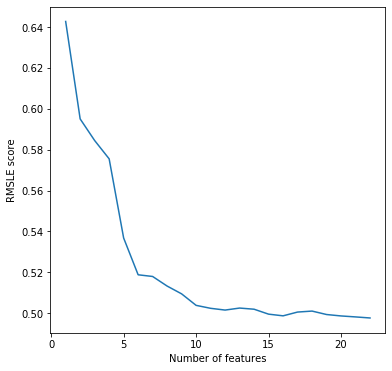

In [24]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_log_error
thresholds = sorted(xgbmodel.feature_importances_,reverse=True)
RMSLElist =[]
nlist =[]
for thresh in thresholds:
    selection = SelectFromModel(xgbmodel,threshold = thresh, prefit = True)
    X_train_selected = selection.transform(X_train)
    X_test_selected = selection.transform(X_test)
    
    model2 = XGBRegressor(objective ='reg:squarederror',n_estimaors = 30,max_depth=15,learning_rate=0.1)
    model2.fit(X_train_selected,Y_train)
    
    pred = model2.predict(X_test_selected)
    pred = np.where(pred<0,0,pred)
    RMSLE_score = RMSLE(Y_test,pred)
    #mse = mean_squared_error(Y_test,pred)
    n_features = X_train_selected.shape[1]
    print ('Thresh = %.3f,n = %d, RMSLE:%.4f' % (thresh, n_features,RMSLE_score))
    RMSLElist.append(RMSLE_score)
    nlist.append(n_features)

pyplot.figure(figsize=(6,6))
pyplot.xlabel('Number of features')
pyplot.ylabel('RMSLE score')
pyplot.plot(nlist,RMSLElist)
pyplot.show()

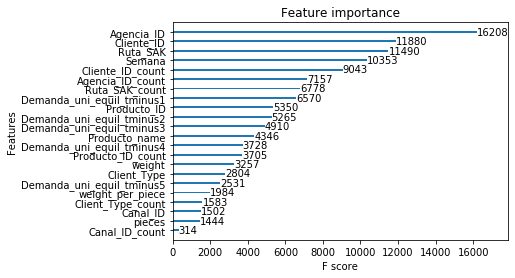

In [25]:
from xgboost import plot_importance
plot_importance(xgbmodel)
pyplot.grid()

In [ ]:
from sklearn.feature_selection import SelectFromModel
select_best = SelectFromModel(xgbmodel,max_features = 16,prefit = True,threshold=-np.inf)
X_train_selected = select_best.transform(X_train)
X_test_selected = select_best.transform(X_test)
model_best = XGBRegressor(objective ='reg:squarederror',n_estimaors = 30,max_depth=15,learning_rate=0.1)
model_best.fit(X_train_selected,Y_train)

In [ ]:
dffff = pd.DataFrame(X_train_selected)
dffff

In [29]:
kaggle_test = pd.read_csv('test_modified.csv')

In [32]:
kaggle_test[:5]

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Client_Type,Producto_name,weight,pieces,...,Demanda_uni_equil_tminus2,Demanda_uni_equil_tminus3,Demanda_uni_equil_tminus4,Demanda_uni_equil_tminus5,Agencia_ID_count,Canal_ID_count,Ruta_SAK_count,Cliente_ID_count,Producto_ID_count,Client_Type_count
0,11,4037,1,2209,4639078,35305,9,25,75.0,NaN,...,4.0,0.0,0.0,0.0,55364.777,8197713.0,406.22223,2.500000,113887.664,1616014.20
1,10,1612,1,2837,4414012,35305,9,25,75.0,NaN,...,0.0,0.0,0.0,0.0,25455.777,8197713.0,6128.44430,1.571428,113887.664,1616014.20
2,10,1120,1,2119,669062,35305,13,25,75.0,NaN,...,7.0,0.0,0.0,0.0,56710.668,8197713.0,8663.66700,14.000000,113887.664,1875493.10
3,11,2012,1,2151,4470173,35305,9,25,75.0,NaN,...,0.0,0.0,0.0,0.0,65741.336,8197713.0,16893.88900,8.000000,113887.664,1616014.20
4,10,2016,1,2826,447801,35305,6,25,75.0,NaN,...,0.0,0.0,0.0,0.0,51624.110,8197713.0,8898.66700,4.125000,113887.664,62092.11


In [ ]:
train_modified.fillna(train_modified.mean(),inplace = True)
train_modified.isnull().any()

In [36]:
kaggle_prediction = model_best.predict(kaggle_test)
kaggle_prediction = np.where(kaggle_prediction<0,0,kaggle_prediction)
kaggle_result = RMSLE(kaggle_prediction)
kaggle_df = pd.DataFrame(kaggle_prediction, dtype= float, columns = ['Demanda_uni_equil'])
df.to_csv('kaggle_submission',index = True, header =True, index_label = 'id')

ValueError: feature_names mismatch: ['f0', 'f1', 'f2', 'f3'] ['Semana', 'Agencia_ID', 'Canal_ID', 'Ruta_SAK', 'Cliente_ID', 'Producto_ID', 'Client_Type', 'Producto_name', 'weight', 'pieces', 'weight_per_piece', 'Demanda_uni_equil_tminus1', 'Demanda_uni_equil_tminus2', 'Demanda_uni_equil_tminus3', 'Demanda_uni_equil_tminus4', 'Demanda_uni_equil_tminus5', 'Agencia_ID_count', 'Canal_ID_count', 'Ruta_SAK_count', 'Cliente_ID_count', 'Producto_ID_count', 'Client_Type_count']
expected f3, f0, f2, f1 in input data
training data did not have the following fields: Canal_ID, Canal_ID_count, Cliente_ID, pieces, Producto_ID_count, Agencia_ID, Agencia_ID_count, Producto_name, Producto_ID, Client_Type_count, Demanda_uni_equil_tminus2, Cliente_ID_count, weight, Demanda_uni_equil_tminus5, weight_per_piece, Demanda_uni_equil_tminus4, Ruta_SAK_count, Demanda_uni_equil_tminus1, Client_Type, Ruta_SAK, Demanda_uni_equil_tminus3, Semana

In [ ]:
# 1. 
# 2. scaled只对numerical，id feature取出
# 3. 新产品
# 4. 
